In [1]:
import networkx as nx

In [2]:
import requests

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
from matplotlib import cm


In [7]:
protein_list = ['ANOS1','APP','CALR','CD22','CEL','EGFL7','ENPP1','EPPIN','EPPIN-WFDC6','ERP44','FOLR1','FOLR2','FZD9','KRT4','MMP16','MSN','NLGN1','NLGN2','NLGN3','NLGN4X','NOTCH1','NOTCH2','NOTCH3','PCSK6','PDIA3','PDIA4','PTPRJ','ROBO1','SFRP1','TEK','WNT3A','WNT4']

In [8]:
proteins='%0D'.join(protein_list)

In [9]:
url = 'https://string-db.org/api/tsv/network?identifiers='+ proteins + '&species=9606'

In [10]:
r= requests.get(url)

In [11]:
lines = r.text.split("\n") #pulls the test from response object and split 

In [12]:
data=[l.split('\t') for l in lines] # splits each lineinto components

In [13]:
# change to dataframe - use first row as column names


In [14]:
df= pd.DataFrame(data[1:-1], columns= data[0])

In [15]:
#dataframe with prefered names of the two proteins and the score of the interaction

In [16]:
interactions = df[['preferredName_A', 'preferredName_B', 'score']]

In [17]:
G=nx.Graph(name='Protein Interaction Graph')

In [18]:
interactions = np.array(interactions)

In [19]:
for i in range(len(interactions)):
    interaction = interactions[i]
    a=interaction[0] #protein a node
    b=interaction[1] #protein b node
    w=float(interaction[2]) # score as weighted edge where high scores = low weight
    G.add_weighted_edges_from([(a,b,w)])# add weighted edge to graph

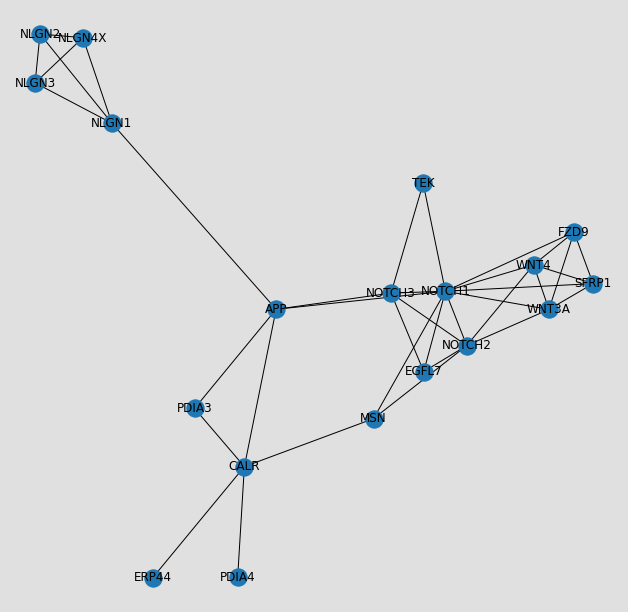

In [20]:
pos=nx.spring_layout(G)# position the nodes using the spring layout
plt.figure(figsize=(11,11), facecolor=[0.7,0.7,0.7,0.4])
nx.draw_networkx(G)
plt.axis('off')
plt.show()

In [21]:
nx.info(G)

'Name: Protein Interaction Graph\nType: Graph\nNumber of nodes: 19\nNumber of edges: 37\nAverage degree:   3.8947'

In [24]:
# a func to rescale the list of values to range [newmin,newmax]
def rescale(l,newmin,newmax):
    arr=list(l)
    return[(x-min(arr))/(max(arr)-min(arr))*(newmax-newmin)+newmin for x in arr]

In [25]:
# now to use the matplotlib plasma colormap
graph_colormap= cm.get_cmap('plasma',12)

In [28]:
# vary node colour by degree
c = rescale([G.degree(v) for v in G],0.0,0.9)
c=[graph_colormap(i) for i in c]
# node size vary with betweeness centralities - map to range [10,100]
bc = nx.betweenness_centrality(G) 
s = rescale([v for v in bc.values()],1500,7000)

In [29]:
# edge widths show 1-weight to convert cost back to strength of interaction
ew = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,4)
# show edge weight with colour also
ec = rescale([float(G[u][v]['weight']) for u,v in G.edges],0.1,1)
ec= [graph_colormap(i) for i in ec]

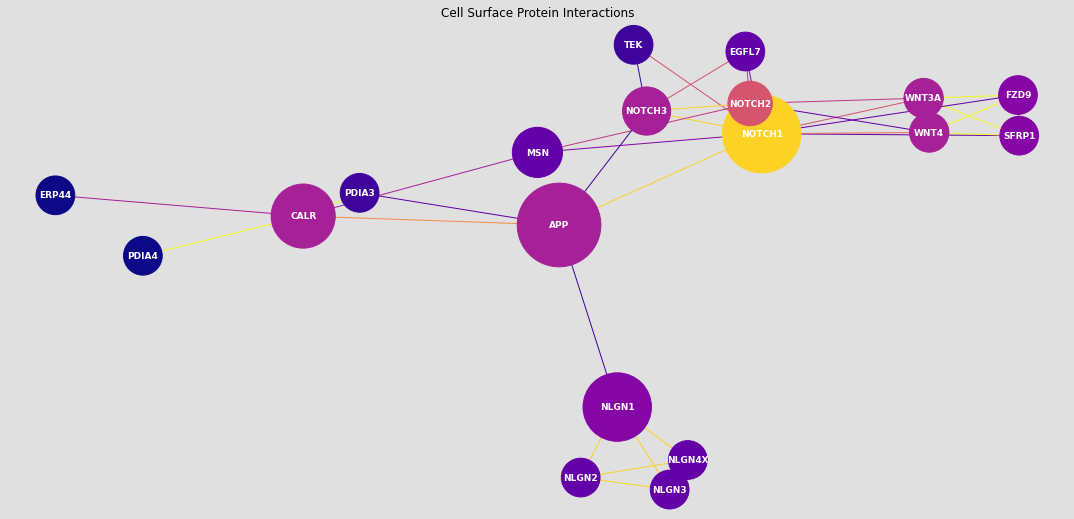

In [54]:
# use the colour mappings to create an enhanced visualization  as follows:
pos= nx.spring_layout(G)
p = plt.figure(figsize=(19,9), facecolor = [0.7,0.7,0.7,0.4])
nx.draw_networkx(G, pos=pos, with_labels=True, node_color=c, node_size=s, edge_color =ec, font_color='white', font_weight='bold',font_size='9')
plt.axis('off')
plt.title('Cell Surface Protein Interactions')

plt.savefig("plot.png", format="png")
plt.show()
